In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from math import ceil

In [113]:
from pandas_profiling import ProfileReport

In [114]:
bf = pd.read_csv('Excel/black_friday.csv')
bf.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [116]:
profile = ProfileReport(bf, title="Pandas Profiling Report")

In [117]:
#profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [118]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [119]:
bf.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [120]:
bf2 = bf.drop(columns = ['User_ID', 'Product_ID'], axis=1)

In [121]:
bf2.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969

In [122]:
age_mapping = {
    '0-17' : 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+'  : 6
}

bf2['Age Category'] = bf2['Age'].map(age_mapping)
bf2.drop(columns='Age', axis=1, inplace=True)
bf2.head()

Gender  Occupation City_Category Stay_In_Current_City_Years  Marital_Status  \
0      F          10             A                          2               0   
1      F          10             A                          2               0   
2      F          10             A                          2               0   
3      F          10             A                          2               0   
4      M          16             C                         4+               0   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3                 NaN                 NaN      8370   
1                   1                 6.0                14.0     15200   
2                  12                 NaN                 NaN      1422   
3                  12                14.0                 NaN      1057   
4                   8                 NaN                 NaN      7969   

   Age Category  
0             0  
1             0  
2             0  
3             0  
4             6

In [123]:
bf2['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [124]:
city_mapping = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4+': 4
}

bf2['Stay_City Category'] = bf2['Stay_In_Current_City_Years'].map(city_mapping)
bf2.drop(columns='Stay_In_Current_City_Years', axis=1, inplace=True)
bf2.head()

Gender  Occupation City_Category  Marital_Status  Product_Category_1  \
0      F          10             A               0                   3   
1      F          10             A               0                   1   
2      F          10             A               0                  12   
3      F          10             A               0                  12   
4      M          16             C               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Age Category  \
0                 NaN                 NaN      8370             0   
1                 6.0                14.0     15200             0   
2                 NaN                 NaN      1422             0   
3                14.0                 NaN      1057             0   
4                 NaN                 NaN      7969             6   

   Stay_City Category  
0                   2  
1                   2  
2                   2  
3                   2  
4                   4

In [125]:
bf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Gender              550068 non-null  object 
 1   Occupation          550068 non-null  int64  
 2   City_Category       550068 non-null  object 
 3   Marital_Status      550068 non-null  int64  
 4   Product_Category_1  550068 non-null  int64  
 5   Product_Category_2  376430 non-null  float64
 6   Product_Category_3  166821 non-null  float64
 7   Purchase            550068 non-null  int64  
 8   Age Category        550068 non-null  int64  
 9   Stay_City Category  550068 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 42.0+ MB


In [126]:
bf2['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [127]:
bf2['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [128]:
for column in bf2.columns:
    bf2[column].fillna(bf2[column].mode()[0], inplace=True)
bf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Gender              550068 non-null  object 
 1   Occupation          550068 non-null  int64  
 2   City_Category       550068 non-null  object 
 3   Marital_Status      550068 non-null  int64  
 4   Product_Category_1  550068 non-null  int64  
 5   Product_Category_2  550068 non-null  float64
 6   Product_Category_3  550068 non-null  float64
 7   Purchase            550068 non-null  int64  
 8   Age Category        550068 non-null  int64  
 9   Stay_City Category  550068 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 42.0+ MB


In [129]:
bf2.head()

Gender  Occupation City_Category  Marital_Status  Product_Category_1  \
0      F          10             A               0                   3   
1      F          10             A               0                   1   
2      F          10             A               0                  12   
3      F          10             A               0                  12   
4      M          16             C               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Age Category  \
0                 8.0                16.0      8370             0   
1                 6.0                14.0     15200             0   
2                 8.0                16.0      1422             0   
3                14.0                16.0      1057             0   
4                 8.0                16.0      7969             6   

   Stay_City Category  
0                   2  
1                   2  
2                   2  
3                   2  
4                   4

In [130]:
object_cols = bf2.loc[:, bf2.dtypes == object]
object_cols = [col for col in object_cols]
object_cols

['Gender', 'City_Category']

In [131]:
bf2['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

# Using Ordinal Encoder

In [132]:
ordinal_encoder = OrdinalEncoder()
bf2[['City_Category']] = ordinal_encoder.fit_transform(bf2[['City_Category']])
bf2.head()

Gender  Occupation  City_Category  Marital_Status  Product_Category_1  \
0      F          10            0.0               0                   3   
1      F          10            0.0               0                   1   
2      F          10            0.0               0                  12   
3      F          10            0.0               0                  12   
4      M          16            2.0               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Age Category  \
0                 8.0                16.0      8370             0   
1                 6.0                14.0     15200             0   
2                 8.0                16.0      1422             0   
3                14.0                16.0      1057             0   
4                 8.0                16.0      7969             6   

   Stay_City Category  
0                   2  
1                   2  
2                   2  
3                   2  
4                   4

# One Hot Encoding

In [133]:
bf2 = pd.get_dummies(bf2, columns=['Gender'], drop_first=True)
bf2.head()

Occupation  City_Category  Marital_Status  Product_Category_1  \
0          10            0.0               0                   3   
1          10            0.0               0                   1   
2          10            0.0               0                  12   
3          10            0.0               0                  12   
4          16            2.0               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Age Category  \
0                 8.0                16.0      8370             0   
1                 6.0                14.0     15200             0   
2                 8.0                16.0      1422             0   
3                14.0                16.0      1057             0   
4                 8.0                16.0      7969             6   

   Stay_City Category  Gender_M  
0                   2         0  
1                   2         0  
2                   2         0  
3                   2         0  
4                   4         1

In [134]:
bf2.describe()

Occupation  City_Category  Marital_Status  Product_Category_1  \
count  550068.000000  550068.000000   550068.000000       550068.000000   
mean        8.076707       1.042640        0.409653            5.404270   
std         6.522660       0.760211        0.491770            3.936211   
min         0.000000       0.000000        0.000000            1.000000   
25%         2.000000       0.000000        0.000000            1.000000   
50%         7.000000       1.000000        0.000000            5.000000   
75%        14.000000       2.000000        1.000000            8.000000   
max        20.000000       2.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase   Age Category  \
count       550068.000000       550068.000000  550068.000000  550068.000000   
mean             9.260768           14.989567    9263.968713       2.496430   
std              4.294093            2.739846    5023.065394       1.353632   
min              2.000000            3.000000      12.000000       0.000000   
25%              8.000000           16.000000    5823.000000       2.000000   
50%              8.000000           16.000000    8047.000000       2.000000   
75%             14.000000           16.000000   12054.000000       3.000000   
max             18.000000           18.000000   23961.000000       6.000000   

       Stay_City Category       Gender_M  
count       550068.000000  550068.000000  
mean             1.858418       0.753105  
std              1.289443       0.431205  
min              0.000000       0.000000  
25%              1.000000       1.000000  
50%              2.000000       1.000000  
75%              3.000000       1.000000  
max              4.000000       1.000000

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [136]:
X = bf2.drop('Purchase', axis=1)
y = bf2['Purchase']

# We could use standardscaler before train test split but it doesn't matter

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
FEATURES = [col for col in X.columns]

In [139]:
sc = StandardScaler()
X_train[FEATURES] = sc.fit_transform(X_train[FEATURES])
X_test[FEATURES] = sc.transform(X_test[FEATURES])

<ipython-input-139-3553782c35e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[FEATURES] = sc.fit_transform(X_train[FEATURES])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-139-3553782c35e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [141]:
X_test.head()

Occupation  City_Category  Marital_Status  Product_Category_1  \
84432     1.675244       1.259038       -0.833095           -1.118589   
72724     0.448428      -0.055874       -0.833095           -1.118589   
197032   -1.238444      -1.370786        1.200344            0.659429   
353704   -0.625036      -1.370786       -0.833095           -1.118589   
91198    -0.625036      -0.055874       -0.833095            0.151424   

        Product_Category_2  Product_Category_3  Age Category  \
84432            -1.690284             0.36895      1.850140   
72724             1.336820             0.36895      0.372528   
197032            1.336820             0.36895      0.372528   
353704            1.336820             0.36895     -1.105085   
91198            -0.293159             0.36895     -1.105085   

        Stay_City Category  Gender_M  
84432             0.884814  0.571611  
72724            -0.666318 -1.749443  
197032            0.109248 -1.749443  
353704            0.884814  0.571611  
91198            -1.441884  0.571611

In [143]:
X_train.describe()

Occupation  City_Category  Marital_Status  Product_Category_1  \
count  4.400540e+05   4.400540e+05    4.400540e+05        4.400540e+05   
mean   4.226799e-16  -1.932001e-15   -1.016029e-14       -1.361791e-15   
std    1.000001e+00   1.000001e+00    1.000001e+00        1.000001e+00   
min   -1.238444e+00  -1.370786e+00   -8.330946e-01       -1.118589e+00   
25%   -9.317395e-01  -1.370786e+00   -8.330946e-01       -1.118589e+00   
50%   -1.649795e-01  -5.587393e-02   -8.330946e-01       -1.025791e-01   
75%    9.084845e-01   1.259038e+00    1.200344e+00        6.594287e-01   
max    1.828596e+00   1.259038e+00    1.200344e+00        3.707460e+00   

       Product_Category_2  Product_Category_3  Age Category  \
count        4.400540e+05        4.400540e+05  4.400540e+05   
mean        -1.784710e-15        5.758570e-15  2.654871e-15   
std          1.000001e+00        1.000001e+00  1.000001e+00   
min         -1.690284e+00       -4.377842e+00 -1.843891e+00   
25%         -2.931591e-01        3.689497e-01 -3.662787e-01   
50%         -2.931591e-01        3.689497e-01 -3.662787e-01   
75%          1.103965e+00        3.689497e-01  3.725276e-01   
max          2.035382e+00        1.099225e+00  2.588947e+00   

       Stay_City Category      Gender_M  
count        4.400540e+05  4.400540e+05  
mean        -1.546234e-15 -2.736288e-15  
std          1.000001e+00  1.000001e+00  
min         -1.441884e+00 -1.749443e+00  
25%         -6.663179e-01  5.716106e-01  
50%          1.092480e-01  5.716106e-01  
75%          8.848139e-01  5.716106e-01  
max          1.660380e+00  5.716106e-01

In [161]:
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [156]:
model = LGBMRegressor(num_leaves=31,
    max_depth=10,
    learning_rate=0.01,
    n_estimators=1000,
    random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [158]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(pred, y_test))
error

2934.768767134931

In [168]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(max_depth=10,
    learning_rate=0.01,
    n_estimators=50,
    random_state=42)
model_xgb.fit(X_train, y_train,
             eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=25)
pred_xgb = model_xgb.predict(X_test)

error_xgb = np.sqrt(mean_squared_error(pred_xgb, y_test))
error_xgb

[0]	validation_0-rmse:10444.27051	validation_1-rmse:10426.04492
[25]	validation_0-rmse:8332.84570	validation_1-rmse:8318.42773
[49]	validation_0-rmse:6795.02783	validation_1-rmse:6785.30029


6785.299481978175

# Done For Blackfriday dataset 

# Loan Data

In [201]:
ld = pd.read_csv('Excel/loan_data.csv')
ld.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [202]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [203]:
ld.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [204]:
for col in ld.columns:
    print(f'column name: {col}, \t number of unique elements: {ld[col].nunique()}, \t column type: {ld[col].dtype}')
    print('\n')
    print('-'*100)

column name: credit.policy, 	 number of unique elements: 2, 	 column type: int64


----------------------------------------------------------------------------------------------------
column name: purpose, 	 number of unique elements: 7, 	 column type: object


----------------------------------------------------------------------------------------------------
column name: int.rate, 	 number of unique elements: 249, 	 column type: float64


----------------------------------------------------------------------------------------------------
column name: installment, 	 number of unique elements: 4788, 	 column type: float64


----------------------------------------------------------------------------------------------------
column name: log.annual.inc, 	 number of unique elements: 1987, 	 column type: float64


----------------------------------------------------------------------------------------------------
column name: dti, 	 number of unique elements: 2529, 	 column type: float64



In [205]:
ld['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [206]:
ld2 = ld.copy()
categorical_col = [col for col in ld.columns if ld[col].nunique() < 50]
print(categorical_col)
ld2.drop(categorical_col, axis=1, inplace=True)
ld2.head()

['credit.policy', 'purpose', 'fico', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']


int.rate  installment  log.annual.inc    dti  days.with.cr.line  revol.bal  \
0    0.1189       829.10       11.350407  19.48        5639.958333      28854   
1    0.1071       228.22       11.082143  14.29        2760.000000      33623   
2    0.1357       366.86       10.373491  11.63        4710.000000       3511   
3    0.1008       162.34       11.350407   8.10        2699.958333      33667   
4    0.1426       102.92       11.299732  14.97        4066.000000       4740   

   revol.util  
0        52.1  
1        76.7  
2        25.6  
3        73.2  
4        39.5

In [207]:
def plot(data, cols, nrows, ncols, bins='auto', target=None, figsize=None,
         hspace=None, wspace=None, color = None, plottype=None):
    if figsize != None:
        plt.figure(figsize = figsize)
        
    for col, plot_num in zip(cols, list(range(1, len(cols)+1))):
        plt.subplot(nrows, ncols, plot_num)
        if hspace != None or wspace != None:
            plt.subplots_adjust(hspace = hspace, wspace = wspace)
        if plottype == 'boxplot':
            plt.title(col)
            sns.boxplot(y = data[col])
        elif plottype == 'stripplot':
            plt.title(col)
            sns.stripplot(y = data[col])

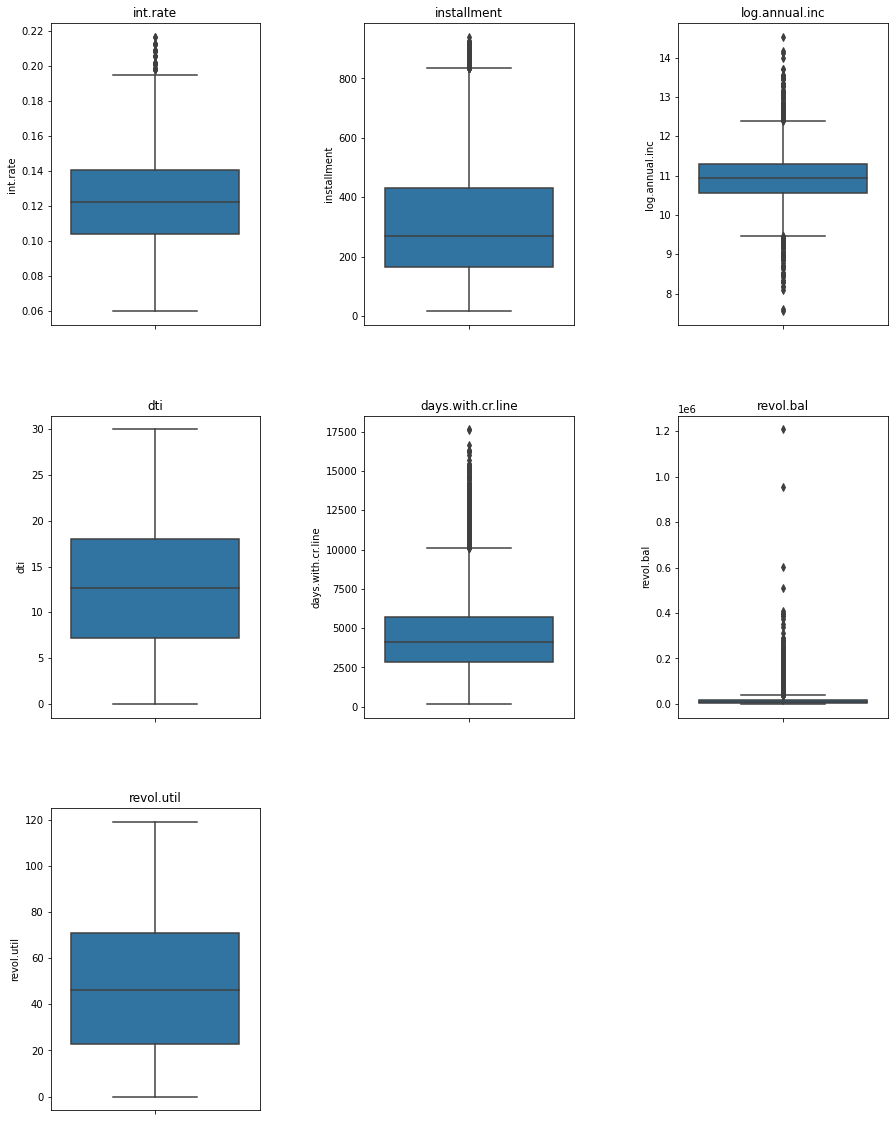

In [208]:
n_cols = 3
num_cols = ld2.columns
n_rows = ceil(len(num_cols)/n_cols)
plot(data=ld2, cols=num_cols, nrows=n_rows, ncols=n_cols, hspace=0.3, wspace=0.5,
    figsize = (15, 20), plottype='boxplot')

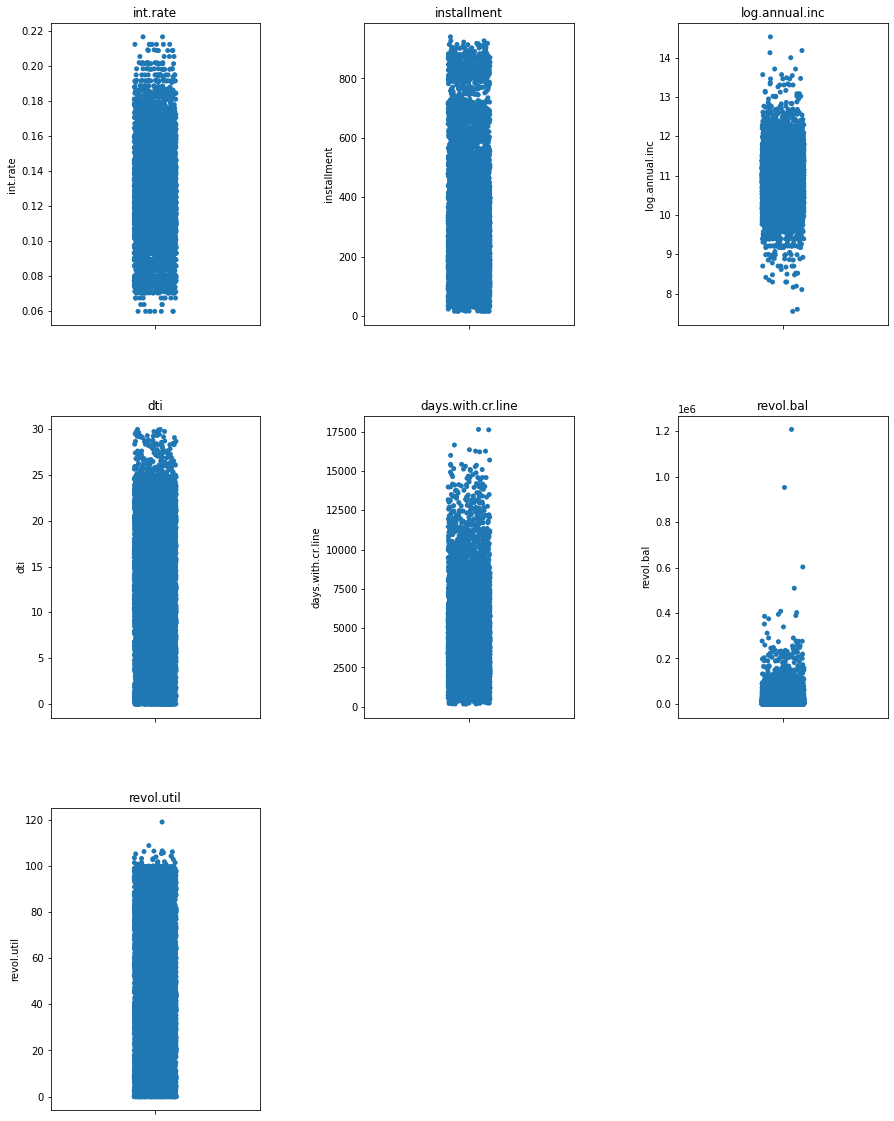

In [192]:
plot(data=ld2, cols=num_cols, nrows=n_rows, ncols=n_cols, hspace=0.3, wspace=0.5,
    figsize = (15, 20), plottype='stripplot')

In [209]:
ld = pd.get_dummies(ld, 
                    columns=['purpose'],
                    drop_first=True)
ld.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [210]:
cols = [col for col in ld.columns]
ld[cols] = sc.fit_transform(ld[cols])

In [212]:
ld.head()

credit.policy  int.rate  installment  log.annual.inc       dti      fico  \
0       0.492222 -0.139318     2.463099        0.680388  0.998505  0.688825   
1       0.492222 -0.578868    -0.438854        0.244031  0.244540 -0.101303   
2       0.492222  0.486484     0.230708       -0.908659 -0.141885 -0.759742   
3       0.492222 -0.813544    -0.757022        0.680388 -0.654697  0.030385   
4       0.492222  0.743509    -1.043992        0.597961  0.343326 -1.154806   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           0.432230   0.353732    0.182704       -0.716989    -0.299730   
1          -0.721230   0.495018    1.030602       -0.716989    -0.299730   
2           0.059770  -0.397073   -0.730683       -0.262470    -0.299730   
3          -0.745277   0.496321    0.909966       -0.262470    -0.299730   
4          -0.198161  -0.360663   -0.251586       -0.716989     1.531147   

    pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0 -0.237003       -0.436524            -0.389558                    1.191856   
1 -0.237003       -0.436524             2.567010                   -0.839028   
2 -0.237003       -0.436524            -0.389558                    1.191856   
3 -0.237003       -0.436524            -0.389558                    1.191856   
4 -0.237003       -0.436524             2.567010                   -0.839028   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0            -0.192721                 -0.265117               -0.218647   
1            -0.192721                 -0.265117               -0.218647   
2            -0.192721                 -0.265117               -0.218647   
3            -0.192721                 -0.265117               -0.218647   
4            -0.192721                 -0.265117               -0.218647   

   purpose_small_business  
0               -0.262855  
1               -0.262855  
2               -0.262855  
3               -0.262855  
4               -0.262855

In [214]:
ld.describe()

credit.policy      int.rate   installment  log.annual.inc  \
count   9.578000e+03  9.578000e+03  9.578000e+03    9.578000e+03   
mean    2.743941e-14  2.790997e-15 -1.677969e-16    1.549513e-15   
std     1.000052e+00  1.000052e+00  1.000052e+00    1.000052e+00   
min    -2.031603e+00 -2.333347e+00 -1.465366e+00   -5.505403e+00   
25%     4.922223e-01 -6.980686e-01 -7.501161e-01   -6.078650e-01   
50%     4.922223e-01 -2.011729e-02 -2.421486e-01   -5.259710e-03   
75%     4.922223e-01  6.727340e-01  5.489849e-01    5.842340e-01   
max     4.922223e-01  3.492564e+00  2.999368e+00    5.849627e+00   

                dti          fico  days.with.cr.line     revol.bal  \
count  9.578000e+03  9.578000e+03       9.578000e+03  9.578000e+03   
mean  -2.345517e-16  2.411356e-16       2.882097e-16 -7.498584e-16   
std    1.000052e+00  1.000052e+00       1.000052e+00  1.000052e+00   
min   -1.831405e+00 -2.603373e+00      -1.754970e+00 -5.010888e-01   
25%   -7.836264e-01 -7.597422e-01      -6.971993e-01 -4.066715e-01   
50%    8.472466e-03 -1.013026e-01      -1.685393e-01 -2.464259e-01   
75%    7.762382e-01  6.888249e-01       4.682925e-01  3.956625e-02   
max    2.520962e+00  3.059207e+00       5.238382e+00  3.526782e+01   

         revol.util  inq.last.6mths   delinq.2yrs       pub.rec  \
count  9.578000e+03    9.578000e+03  9.578000e+03  9.578000e+03   
mean   5.737794e-16   -1.024192e-14  1.013215e-15 -2.096523e-15   
std    1.000052e+00    1.000052e+00  1.000052e+00  1.000052e+00   
min   -1.613049e+00   -7.169889e-01 -2.997301e-01 -2.370032e-01   
25%   -8.340853e-01   -7.169889e-01 -2.997301e-01 -2.370032e-01   
50%   -1.720737e-02   -2.624704e-01 -2.997301e-01 -2.370032e-01   
75%    8.306913e-01    1.920481e-01 -2.997301e-01 -2.370032e-01   
max    2.488574e+00    1.428212e+01  2.350167e+01  1.883877e+01   

       not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
count    9.578000e+03         9.578000e+03                9.578000e+03   
mean    -5.627757e-15         3.918932e-16                3.659864e-16   
std      1.000052e+00         1.000052e+00                1.000052e+00   
min     -4.365239e-01        -3.895583e-01               -8.390276e-01   
25%     -4.365239e-01        -3.895583e-01               -8.390276e-01   
50%     -4.365239e-01        -3.895583e-01               -8.390276e-01   
75%     -4.365239e-01        -3.895583e-01                1.191856e+00   
max      2.290825e+00         2.567010e+00                1.191856e+00   

       purpose_educational  purpose_home_improvement  purpose_major_purchase  \
count         9.578000e+03              9.578000e+03            9.578000e+03   
mean          2.689260e-16             -1.171113e-15           -8.195632e-16   
std           1.000052e+00              1.000052e+00            1.000052e+00   
min          -1.927208e-01             -2.651173e-01           -2.186472e-01   
25%          -1.927208e-01             -2.651173e-01           -2.186472e-01   
50%          -1.927208e-01             -2.651173e-01           -2.186472e-01   
75%          -1.927208e-01             -2.651173e-01           -2.186472e-01   
max           5.188853e+00              3.771915e+00            4.573578e+00   

       purpose_small_business  
count            9.578000e+03  
mean            -2.900304e-15  
std              1.000052e+00  
min             -2.628546e-01  
25%             -2.628546e-01  
50%             -2.628546e-01  
75%             -2.628546e-01  
max              3.804385e+00

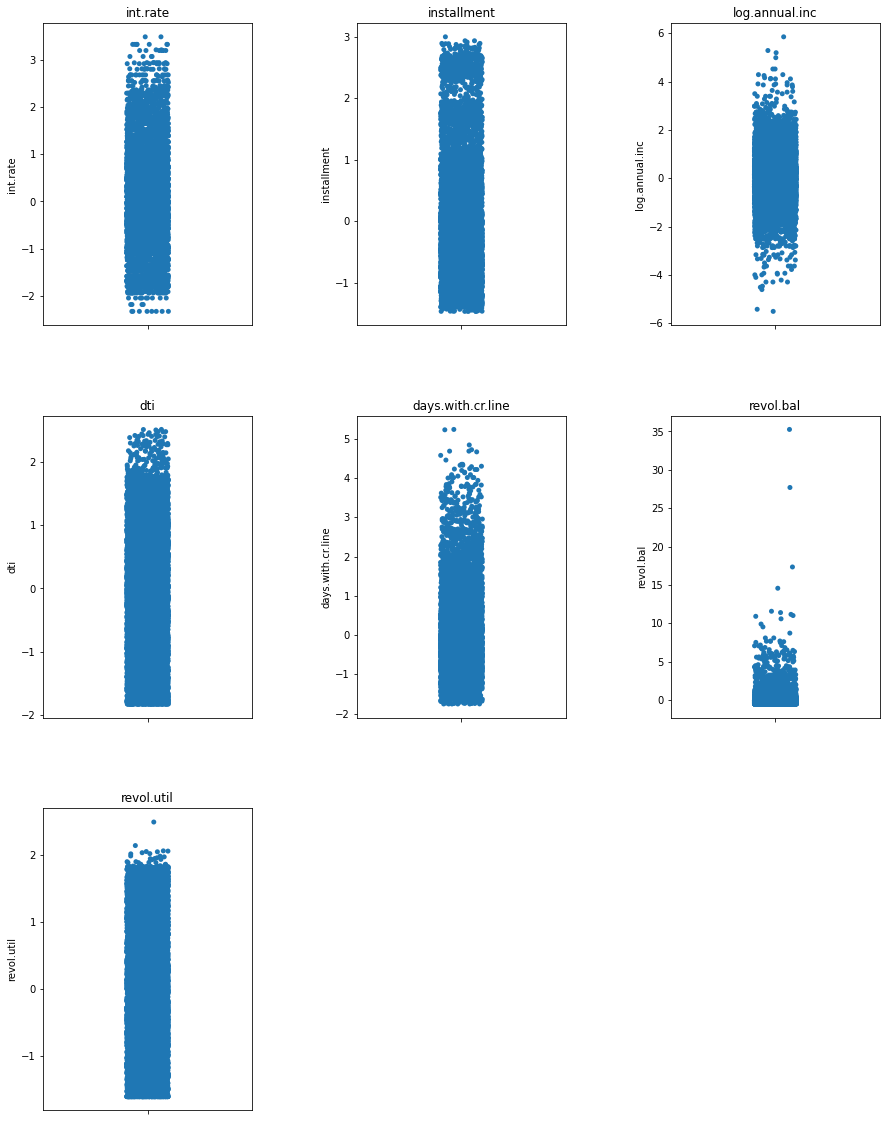

In [215]:
plot(data=ld, cols=num_cols, nrows=n_rows, ncols=n_cols, hspace=0.3, wspace=0.5,
    figsize = (15, 20), plottype='stripplot')

In [216]:
from datasist.structdata import detect_outliers

In [217]:
out_idx = detect_outliers(ld, 0, ['revol.bal'])
out_idx

[5,
 8,
 29,
 34,
 39,
 40,
 57,
 58,
 73,
 92,
 96,
 99,
 109,
 146,
 148,
 155,
 160,
 164,
 187,
 191,
 198,
 259,
 304,
 306,
 316,
 322,
 342,
 393,
 403,
 405,
 407,
 425,
 426,
 432,
 448,
 472,
 507,
 517,
 523,
 549,
 565,
 577,
 578,
 719,
 759,
 769,
 777,
 784,
 799,
 801,
 802,
 820,
 835,
 863,
 890,
 896,
 897,
 912,
 962,
 963,
 971,
 980,
 985,
 992,
 993,
 998,
 1006,
 1057,
 1061,
 1084,
 1099,
 1100,
 1106,
 1122,
 1138,
 1149,
 1183,
 1212,
 1256,
 1260,
 1304,
 1305,
 1316,
 1335,
 1362,
 1364,
 1372,
 1423,
 1432,
 1435,
 1439,
 1443,
 1474,
 1488,
 1509,
 1515,
 1541,
 1551,
 1561,
 1579,
 1582,
 1585,
 1590,
 1594,
 1605,
 1607,
 1608,
 1613,
 1621,
 1633,
 1639,
 1675,
 1686,
 1701,
 1714,
 1716,
 1721,
 1727,
 1739,
 1752,
 1755,
 1764,
 1774,
 1784,
 1834,
 1856,
 1859,
 1865,
 1890,
 1893,
 1910,
 1911,
 1919,
 1921,
 1922,
 1939,
 1960,
 1966,
 1972,
 1977,
 2020,
 2034,
 2051,
 2060,
 2072,
 2096,
 2099,
 2113,
 2115,
 2123,
 2158,
 2193,
 2197,
 2330,
 2

In [218]:
max_value = ld['revol.bal'].max()
mean_value = ld['revol.bal'].mean()
ld['revol.bal'] = np.where(ld['revol.bal']  > 30*mean_value, mean_value, ld['revol.bal'])

<AxesSubplot:ylabel='revol.bal'>

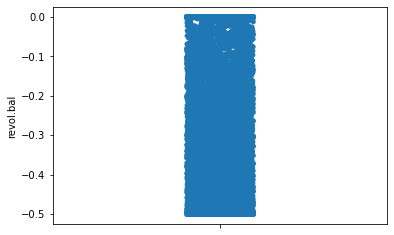

In [219]:
sns.stripplot(data=ld, y=ld['revol.bal'])

<AxesSubplot:ylabel='revol.bal'>

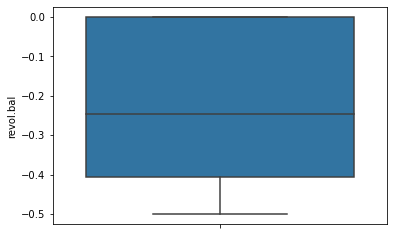

In [220]:
sns.boxplot(data=ld, y=ld['revol.bal'])

## Better than before, I tried to search for the data to understand it, but there was no explanation for the columns in kaggle

In [221]:
ld.describe()

credit.policy      int.rate   installment  log.annual.inc  \
count   9.578000e+03  9.578000e+03  9.578000e+03    9.578000e+03   
mean    2.743941e-14  2.790997e-15 -1.677969e-16    1.549513e-15   
std     1.000052e+00  1.000052e+00  1.000052e+00    1.000052e+00   
min    -2.031603e+00 -2.333347e+00 -1.465366e+00   -5.505403e+00   
25%     4.922223e-01 -6.980686e-01 -7.501161e-01   -6.078650e-01   
50%     4.922223e-01 -2.011729e-02 -2.421486e-01   -5.259710e-03   
75%     4.922223e-01  6.727340e-01  5.489849e-01    5.842340e-01   
max     4.922223e-01  3.492564e+00  2.999368e+00    5.849627e+00   

                dti          fico  days.with.cr.line     revol.bal  \
count  9.578000e+03  9.578000e+03       9.578000e+03  9.578000e+03   
mean  -2.345517e-16  2.411356e-16       2.882097e-16 -2.304905e-01   
std    1.000052e+00  1.000052e+00       1.000052e+00  1.863143e-01   
min   -1.831405e+00 -2.603373e+00      -1.754970e+00 -5.010888e-01   
25%   -7.836264e-01 -7.597422e-01      -6.971993e-01 -4.066715e-01   
50%    8.472466e-03 -1.013026e-01      -1.685393e-01 -2.464259e-01   
75%    7.762382e-01  6.888249e-01       4.682925e-01 -7.498584e-16   
max    2.520962e+00  3.059207e+00       5.238382e+00 -7.498584e-16   

         revol.util  inq.last.6mths   delinq.2yrs       pub.rec  \
count  9.578000e+03    9.578000e+03  9.578000e+03  9.578000e+03   
mean   5.737794e-16   -1.024192e-14  1.013215e-15 -2.096523e-15   
std    1.000052e+00    1.000052e+00  1.000052e+00  1.000052e+00   
min   -1.613049e+00   -7.169889e-01 -2.997301e-01 -2.370032e-01   
25%   -8.340853e-01   -7.169889e-01 -2.997301e-01 -2.370032e-01   
50%   -1.720737e-02   -2.624704e-01 -2.997301e-01 -2.370032e-01   
75%    8.306913e-01    1.920481e-01 -2.997301e-01 -2.370032e-01   
max    2.488574e+00    1.428212e+01  2.350167e+01  1.883877e+01   

       not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
count    9.578000e+03         9.578000e+03                9.578000e+03   
mean    -5.627757e-15         3.918932e-16                3.659864e-16   
std      1.000052e+00         1.000052e+00                1.000052e+00   
min     -4.365239e-01        -3.895583e-01               -8.390276e-01   
25%     -4.365239e-01        -3.895583e-01               -8.390276e-01   
50%     -4.365239e-01        -3.895583e-01               -8.390276e-01   
75%     -4.365239e-01        -3.895583e-01                1.191856e+00   
max      2.290825e+00         2.567010e+00                1.191856e+00   

       purpose_educational  purpose_home_improvement  purpose_major_purchase  \
count         9.578000e+03              9.578000e+03            9.578000e+03   
mean          2.689260e-16             -1.171113e-15           -8.195632e-16   
std           1.000052e+00              1.000052e+00            1.000052e+00   
min          -1.927208e-01             -2.651173e-01           -2.186472e-01   
25%          -1.927208e-01             -2.651173e-01           -2.186472e-01   
50%          -1.927208e-01             -2.651173e-01           -2.186472e-01   
75%          -1.927208e-01             -2.651173e-01           -2.186472e-01   
max           5.188853e+00              3.771915e+00            4.573578e+00   

       purpose_small_business  
count            9.578000e+03  
mean            -2.900304e-15  
std              1.000052e+00  
min             -2.628546e-01  
25%             -2.628546e-01  
50%             -2.628546e-01  
75%             -2.628546e-01  
max              3.804385e+00

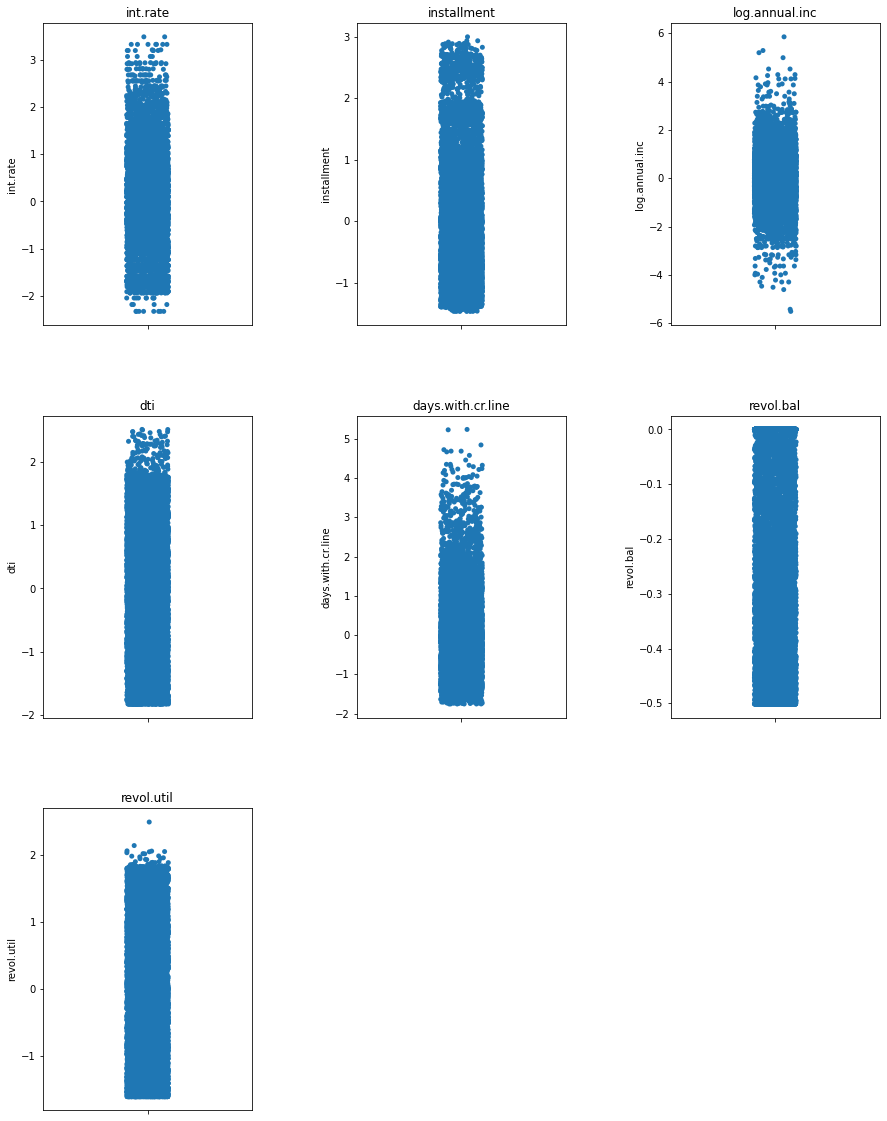

In [222]:
plot(data=ld, cols=num_cols, nrows=n_rows, ncols=n_cols, hspace=0.3, wspace=0.5,
    figsize = (15, 20), plottype='stripplot')